In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from  sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('D:\\training assignments\cars_data.csv')

In [3]:
df.head()

Make           Model   Type Origin DriveTrain     MSRP  EngineSize  \
0  Acura             MDX    SUV   Asia        All  $36,945         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [4]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [7]:
df['MSRP'] = df['MSRP'].str.replace('$','', regex= True)
df['MSRP'] = df['MSRP'].str.replace(',','', regex=True)
df['MSRP'] = df['MSRP'].astype(float)

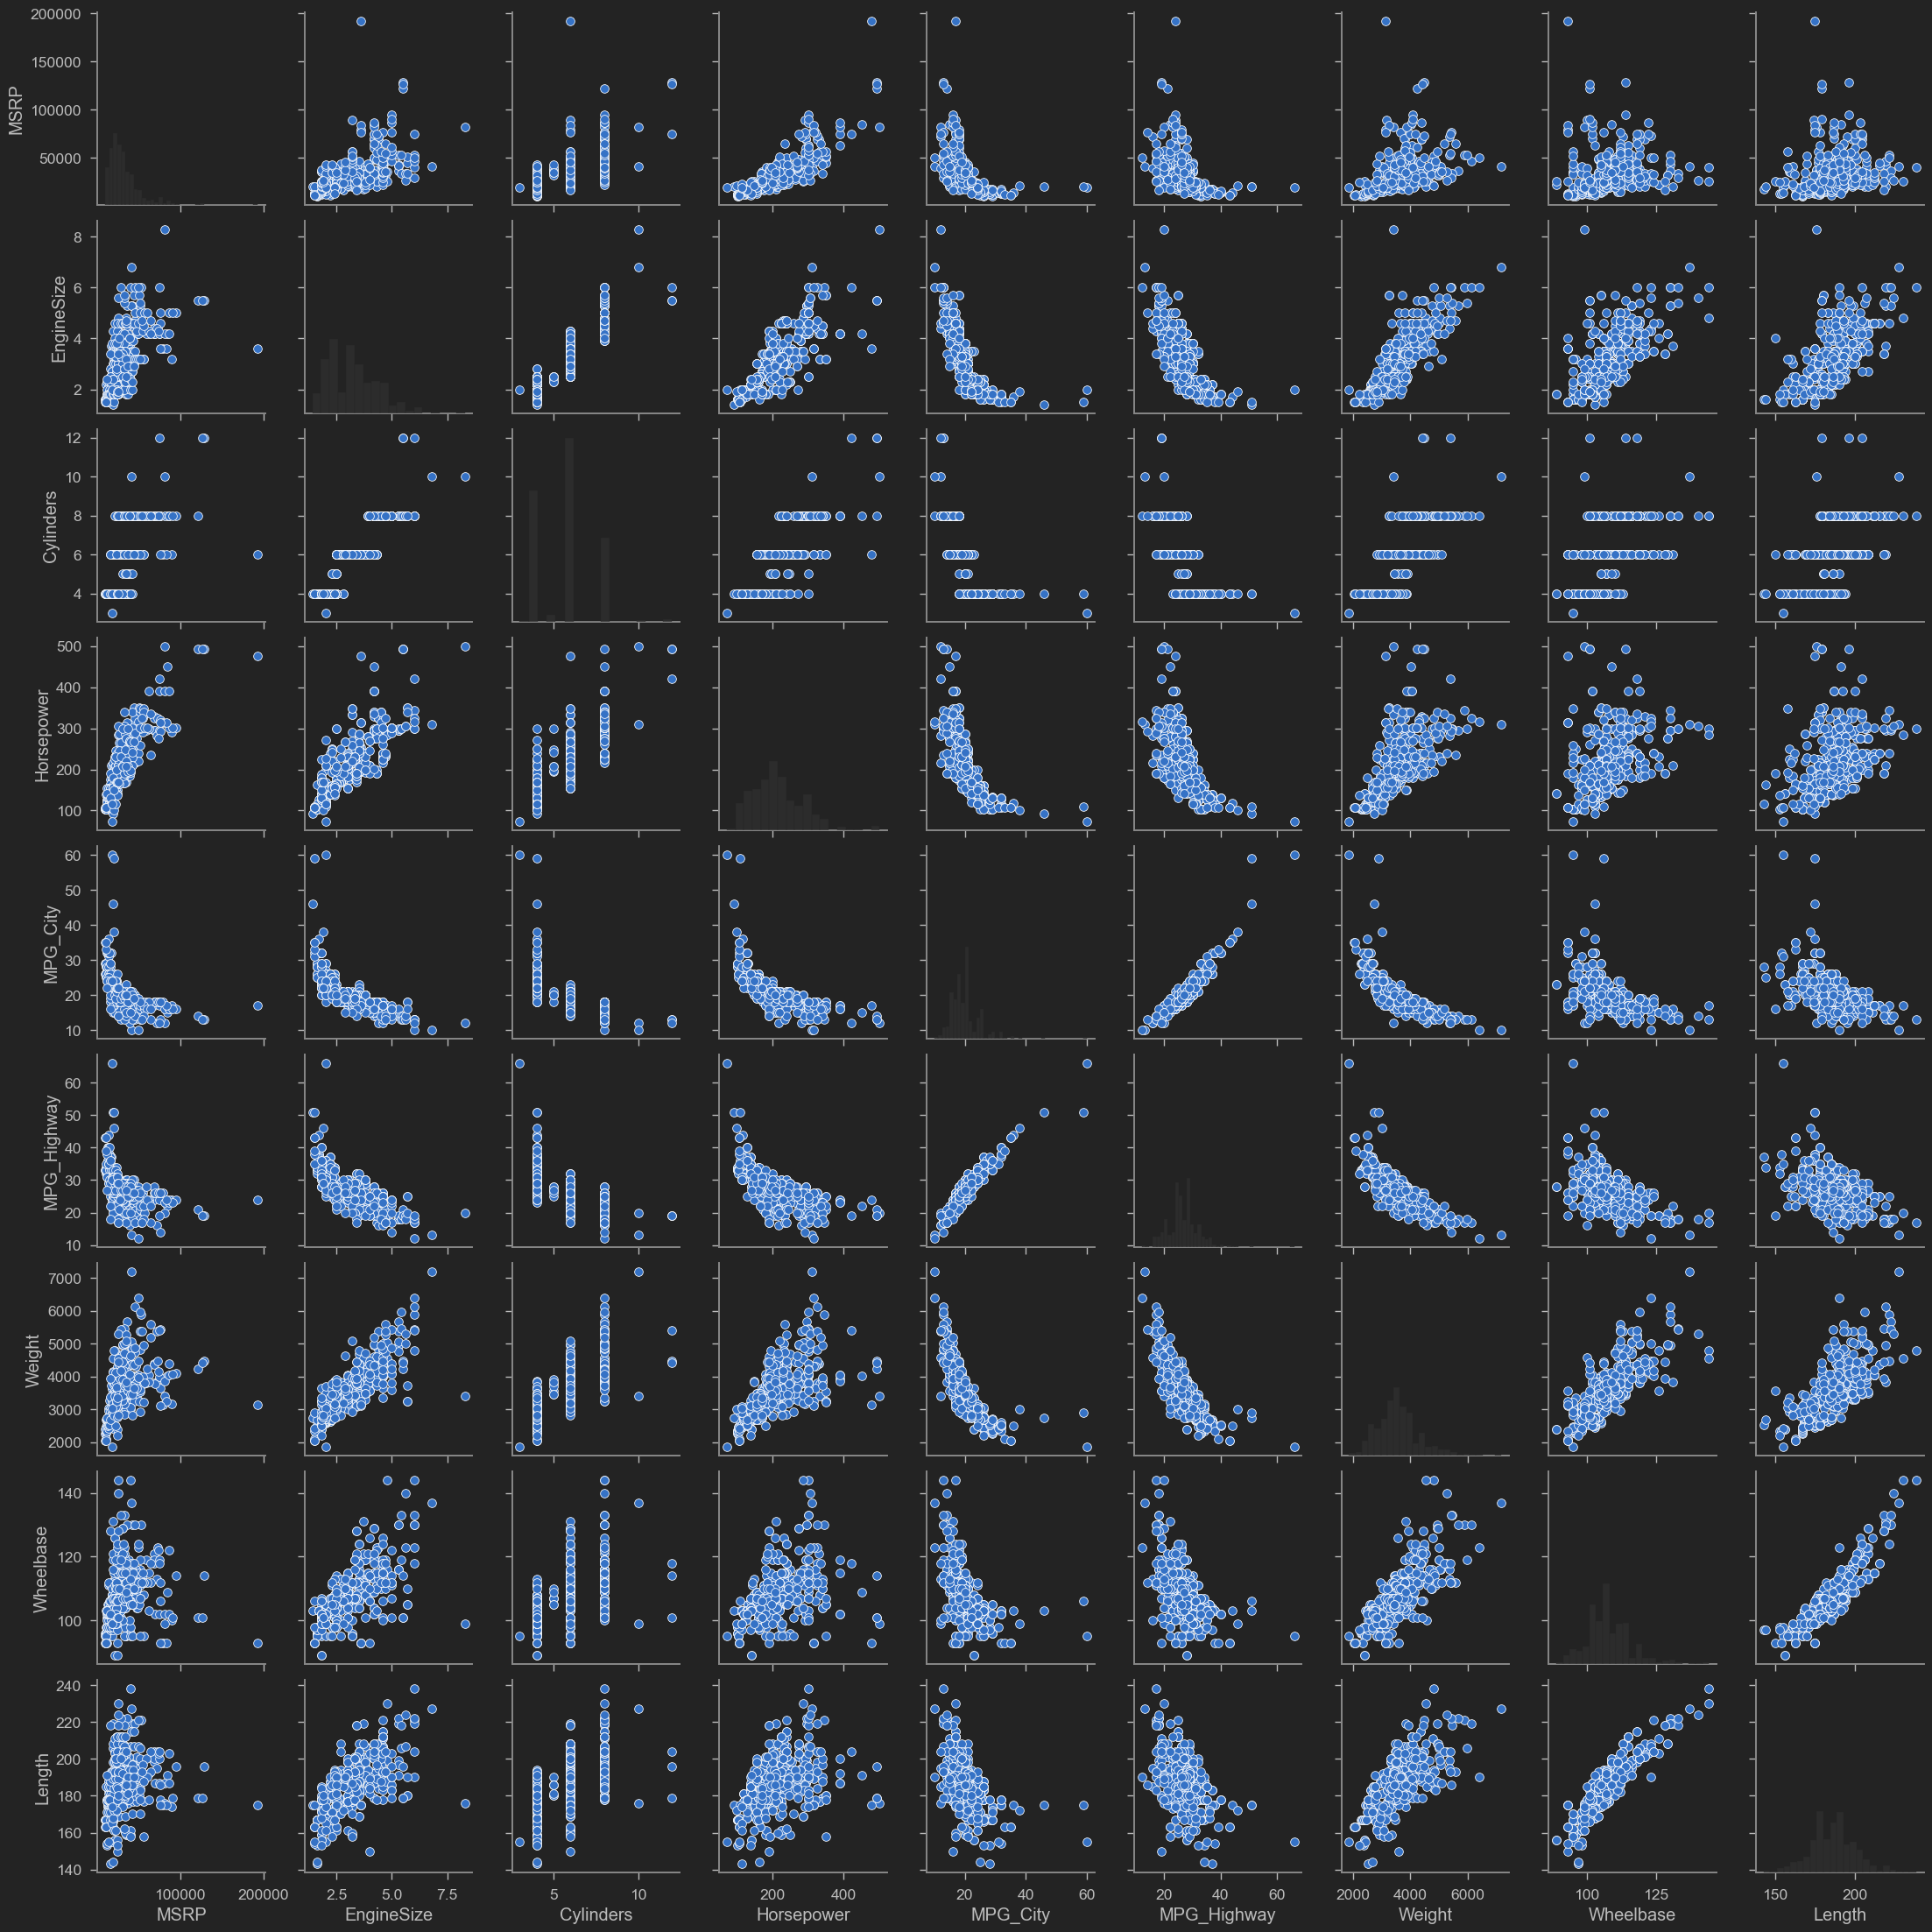

In [8]:
sns.pairplot(df)

In [9]:
df.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [10]:
fig = px.histogram(df, x = 'Make',
                        labels = {'Make':'Manufacturer'},
                        title = 'Manufacturer of Cars')
fig.show()

In [11]:
corr = df.corr()

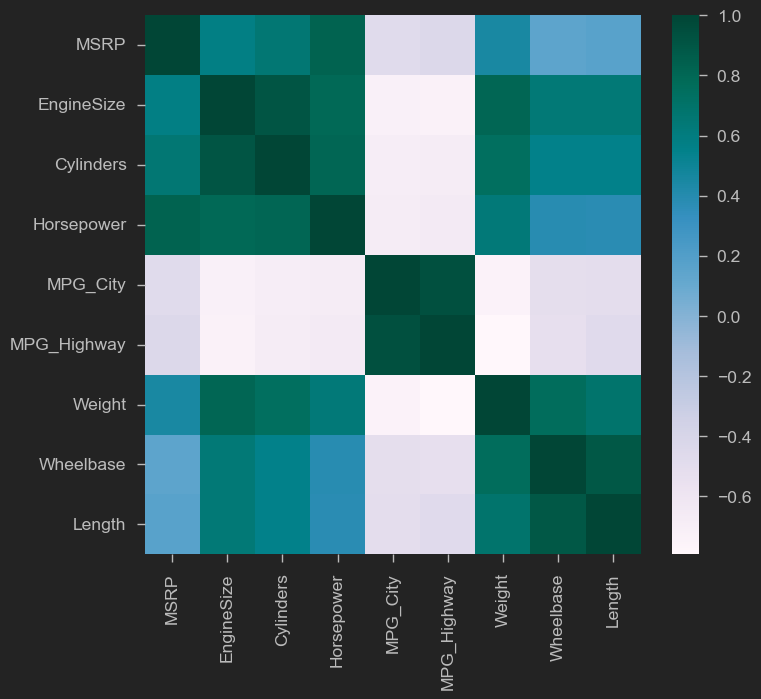

In [12]:
sns.heatmap(corr, cmap='PuBuGn')
plt.show()

In [13]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP           float64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [14]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

In [15]:
df_new = pd.get_dummies(df, columns= ['Make', 'Model', 'Type', 'Origin', 'DriveTrain'])
df_new.head()

MSRP  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0  36945.0         3.5        6.0         265        17           23    4451   
1  23820.0         2.0        4.0         200        24           31    2778   
2  26990.0         2.4        4.0         200        22           29    3230   
3  33195.0         3.2        6.0         270        20           28    3575   
4  43755.0         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  Make_Acura  ...  Type_Sedan  Type_Sports  Type_Truck  \
0        106     189           1  ...           0            0           0   
1        101     172           1  ...           1            0           0   
2        105     183           1  ...           1            0           0   
3        108     186           1  ...           1            0           0   
4        115     197           1  ...           1            0           0   

   Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All  \
0           0            1              0           0               1   
1           0            1              0           0               0   
2           0            1              0           0               0   
3           0            1              0           0               0   
4           0            1              0           0               0   

   DriveTrain_Front  DriveTrain_Rear  
0                 0                0  
1                 1                0  
2                 1                0  
3                 1                0  
4                 1                0  

[5 rows x 482 columns]

In [16]:
df_new.shape

(426, 482)

In [17]:
x = df_new.drop('MSRP',axis=1)
y = df_new['MSRP']

In [18]:
X = np.array(x)
y = np.array(y)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

LINEAR REGRESSION

In [20]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_model.score(x_test, y_test)

0.6351489553201795

DECISION TREE REGRESSOR

In [21]:
dec_model = DecisionTreeRegressor()
dec_model.fit(x_train, y_train)
dec_model.score(x_test, y_test)

0.5322420498959703

RANDOM FOREST REGRESSION

In [22]:
random_model = RandomForestRegressor()
random_model.fit(x_train, y_train)
random_model.score(x_test, y_test)

0.8116108792419561

XGBOOST

In [23]:
xg_model = XGBRegressor()
xg_model.fit(x_train, y_train)
xg_model.score(x_test, y_test)

0.7931646497729368

PREDICTION USING RANDOM FOREST

In [24]:
np_data = x.iloc[350].to_numpy()  #convert to numpy
np_data = np_data.reshape(1,-1)  #reshape to make model understand that we have to predict only one column
prediction = random_model.predict(np_data) #to predict
prediction

array([13091.58])

In [25]:
y[350]

12965.0